# Problem 1

Importing required libraries for EDA

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#use sklearn to import a dataset
from sklearn.datasets import load_iris

a. Identify and rectify any missing values in the data using appropriate techniques. 


In [2]:
#load dataset 
df = pd.read_csv(r"D:\WPI Assignments\Machine Learning CS539-F24\Homeworks\Homework1\datasets\earth_surface_temperatures.csv")
df.head()

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865


In [4]:
#To get highlevel info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534571 entries, 0 to 534570
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Years              534571 non-null  int64  
 1   Month              534571 non-null  int64  
 2   Country            534571 non-null  object 
 3   Temperature        508818 non-null  float64
 4   Monthly_variation  508818 non-null  float64
 5   Anomaly            508818 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.5+ MB


In [5]:
#To get details of dataset
df.describe()

,Years,Month,Temperature,Monthly_variation,Anomaly
count,534571.000000,534571.000000,508818.000000,508818.000000,508818.000000
mean,1917.483008,6.500676,17.059014,-0.075495,0.888305
std,65.628555,3.452036,11.201763,1.231296,1.069699
min,1743.000000,1.000000,-40.349000,-10.566000,0.037000
25%,1873.000000,4.000000,9.776250,-0.663000,0.293000
50%,1924.000000,7.000000,20.705000,-0.076000,0.494000
75%,1972.000000,10.000000,25.911000,0.552000,1.004000
max,2020.000000,12.000000,39.384000,11.817000,12.203000


In [6]:
#Check for missing values in all columns
df.isnull().sum()

Years                    0
Month                    0
Country                  0
Temperature          25753
Monthly_variation    25753
Anomaly              25753
dtype: int64

In [7]:
# Fill missing values with the mean temperature
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

#Using Interpolate to estimate the missing values based on surrounding data.
df['Monthly_variation'] = df['Monthly_variation'].interpolate(method='linear')
df['Anomaly'] = df['Anomaly'].interpolate(method='linear')

#Check
df.isnull().sum()

Years                0
Month                0
Country              0
Temperature          0
Monthly_variation    0
Anomaly              0
dtype: int64

#### b. Transform the Years and Month columns into a single column labeled "Date" in the MM-YYYY format, with a datetime64[ns] data type. For example, the year 1848 and month 5 should be unified as a single value, such as 5-1848.

In [8]:
# Combine Year and Month into a single Date column
df['Date'] = pd.to_datetime(df[['Years', 'Month']].assign(DAY=1))


#check 
print(df['Date'].dtype)

# Formating Date as MM-YYYY
#df['Date'] = df['Date'].dt.strftime('%m-%Y')

datetime64[ns]


In [9]:
df.nunique()

Years                  278
Month                   12
Country                233
Temperature          71364
Monthly_variation    35664
Anomaly              32287
Date                  3325
dtype: int64

c. Detect and investigate extreme temperature values that might be regarded as 
outliers.

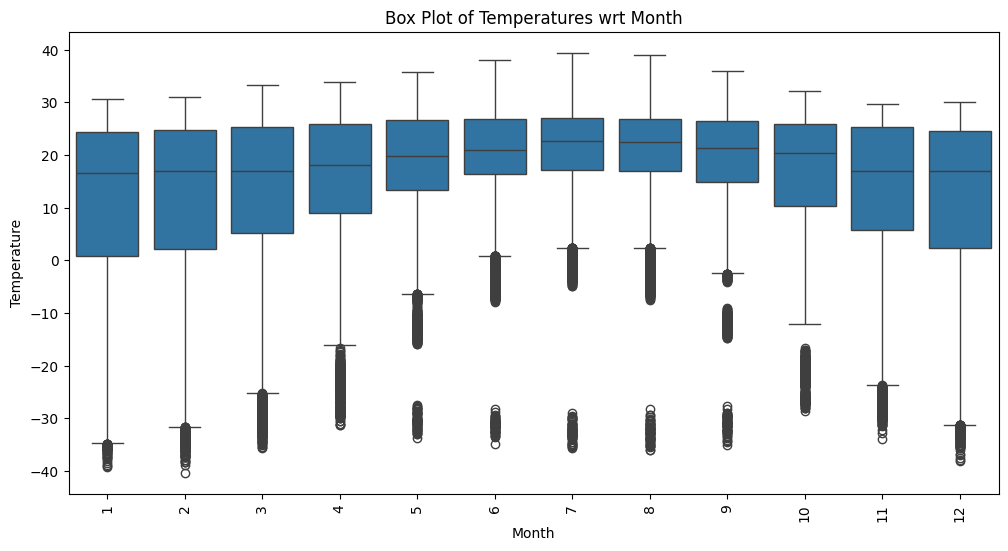

In [10]:
# Use IQR to detect outliers
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Temperature'] < (Q1 - 1.5 * IQR)) | (df['Temperature'] > (Q3 + 1.5 * IQR))]

# Create a box plot for temperature across different Months
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=df)
plt.title('Box Plot of Temperatures wrt Month')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()




d. Compute summary statistics for temperature, monthly variation, and anomaly 
values, including mean, median, standard deviation, and range

In [11]:
# Summary statistics
summary_stats = ['Temperature', 'Monthly_variation', 'Anomaly']
print(df[summary_stats].mean)
print(df[summary_stats].median) 
print(df[summary_stats].std)


<bound method DataFrame.mean of         Temperature  Monthly_variation  Anomaly
0            19.573             -0.297    2.037
1            23.894             -0.796    2.136
2            26.507             -0.113    1.937
3            24.498             -0.462    1.937
4            19.068             -1.272    1.865
...             ...                ...      ...
534566       19.621              1.401    0.466
534567       22.638              1.008    0.246
534568       24.588              0.458    0.294
534569       25.934              1.724    1.035
534570       23.595             -0.025    0.574

[534571 rows x 3 columns]>
<bound method DataFrame.median of         Temperature  Monthly_variation  Anomaly
0            19.573             -0.297    2.037
1            23.894             -0.796    2.136
2            26.507             -0.113    1.937
3            24.498             -0.462    1.937
4            19.068             -1.272    1.865
...             ...                ...    

e. Identify the countries included in the dataset and calculate their average 
temperature values.

In [12]:
country_avg_temp = df.groupby('Country')['Temperature'].mean()
print(country_avg_temp)

Country
Afghanistan       14.476292
Albania           12.760633
Algeria           22.063457
American Samoa    25.880581
Andorra           11.142018
                    ...    
Virgin Islands    25.354143
Western Sahara    23.297923
Yemen             26.169337
Zambia            21.356084
Zimbabwe          21.185253
Name: Temperature, Length: 233, dtype: float64


f. Determine the overall trend in global temperatures over the years and visualize 
this trend using a suitable chart.

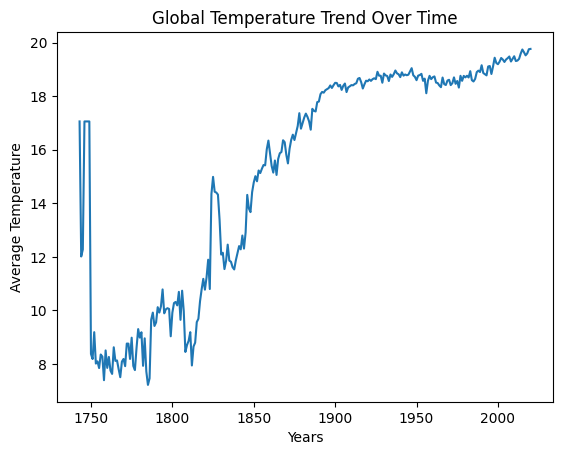

In [13]:
# Plot global temperature trend
global_avg_temp = df.groupby('Years')['Temperature'].mean()
plt.plot(global_avg_temp)
plt.title('Global Temperature Trend Over Time')
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.show()


g. Identify the months with the highest and lowest temperatures for each country 
and find out whether there are noticeable seasonal patterns in the temperature 
data.

In [14]:
# Group by country and month to find highest and lowest temperatures
monthly_temps = df.groupby(['Country', 'Month'])['Temperature'].agg(['max', 'min'])
print(monthly_temps)

                         max        min
Country     Month                      
Afghanistan 1      17.059014  -4.588000
            2      17.059014  -3.363000
            3      17.059014   3.783000
            4      18.464000  11.174000
            5      24.264000  16.760000
...                      ...        ...
Zimbabwe    8      21.099000  15.354000
            9      24.458000  17.059014
            10     26.501000  21.800000
            11     26.732000  22.262000
            12     26.399000  21.687000

[2796 rows x 2 columns]


h. Explore the variation in temperature anomalies on a monthly basis and identify 
any months with consistently high or low anomalies across the years.

Month
1     1.087663
2     1.070799
3     0.945735
4     0.907018
5     0.871095
6     0.897670
7     0.870470
8     0.846216
9     0.832799
10    0.861273
11    0.961545
12    1.002390
Name: Anomaly, dtype: float64


<Axes: xlabel='Month', ylabel='Years'>

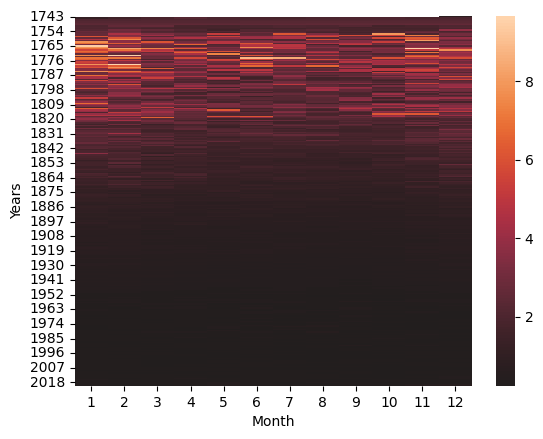

In [15]:
monthly_anomalies = df.groupby('Month')['Anomaly'].mean()
print(monthly_anomalies)

# Pivot table to show anomalies by month and year
anomaly_pivot = df.pivot_table(values='Anomaly', index='Years', columns='Month', aggfunc='mean')

# Plot heatmap
sns.heatmap(anomaly_pivot, center=0)

i. Choose five countries and compare the trends in their temperatures over the 
years, seeking any similar temperature patterns

<Axes: xlabel='Years', ylabel='Temperature'>

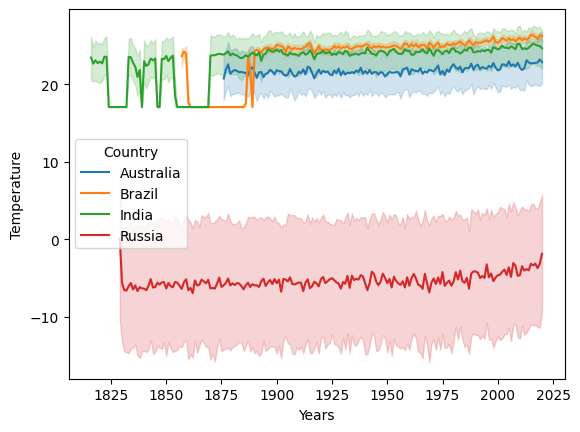

In [16]:
countries = ['USA', 'India', 'Brazil', 'Russia', 'Australia']
df_five_countries = df[df['Country'].isin(countries)]

# Plot temperature trends for the five countries
sns.lineplot(x='Years', y='Temperature', hue='Country', data=df_five_countries)


j. Explore the potential correlation between temperature and monthly variation or anomaly values. Calculate correlation coefficients and create scatterplots to investigate this relationship.

<Axes: xlabel='Temperature', ylabel='Anomaly'>

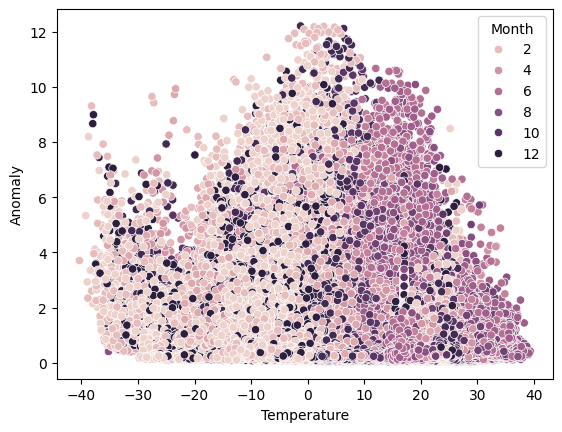

In [18]:
# Calculate correlation
correlation = df[['Temperature', 'Anomaly']].corr()

# Scatter plot to visualize correlation
#sns.scatterplot(x='Temperature', y='Anomaly',style= , data=df)
sns.scatterplot(x='Temperature', y='Anomaly', hue='Month' , data=df)



k. Provide an intriguing insight from the dataset by utilizing data visualization 
techniques such as histograms, box plots, or heatmaps to represent the data's 
distribution, trends, and relationships.

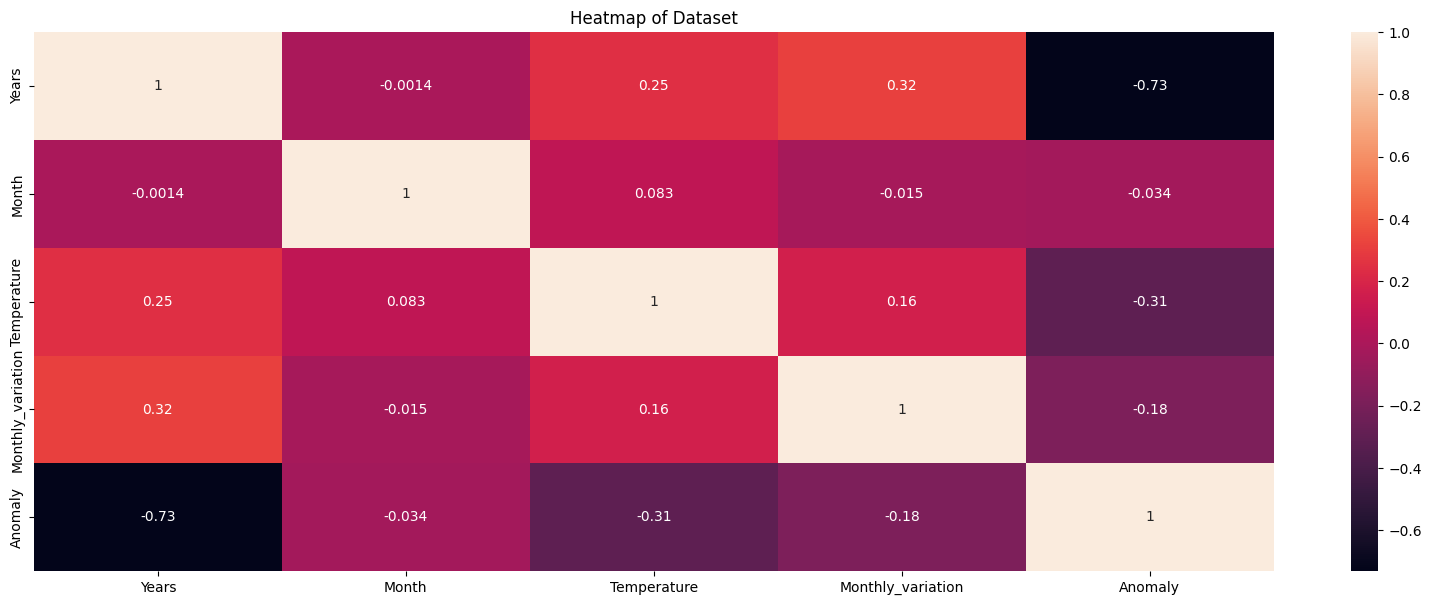

In [171]:
#Plotting Heatmap
#numeric_data = df.select_dtypes(include=['float64', 'int64'])
#correlation_matrix = df.corr()
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.rcParams['figure.figsize'] = (20,7)
plt.title('Heatmap of Dataset')
plt.show()

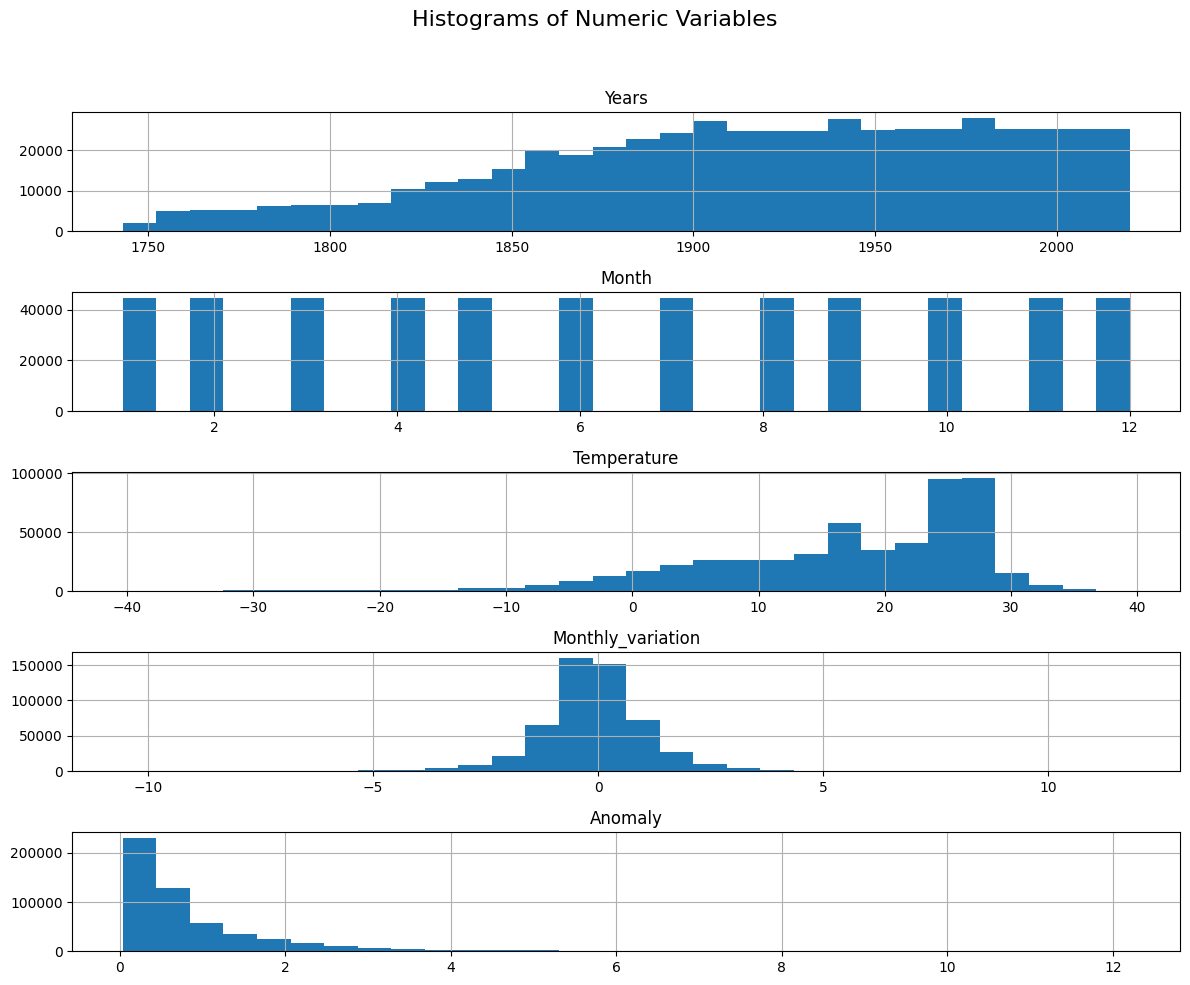

In [172]:
#Plotting Combined Histogram for all columns
numeric_data.hist(bins=30, figsize=(12, 10), layout=(len(numeric_data.columns), 1))
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

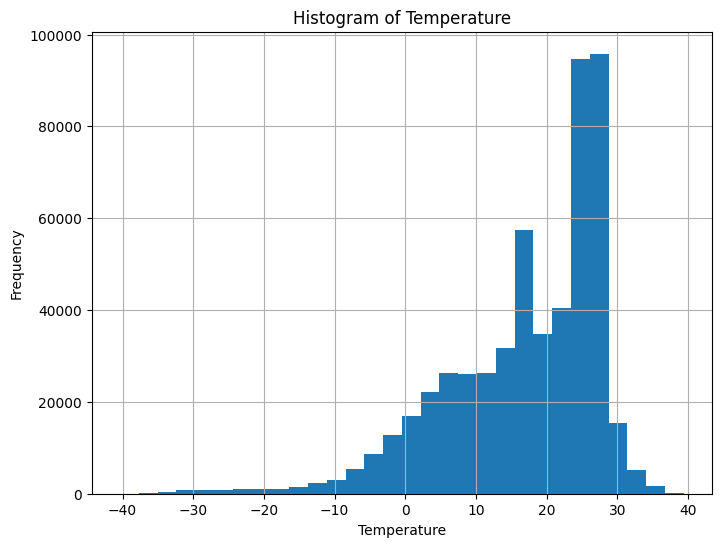

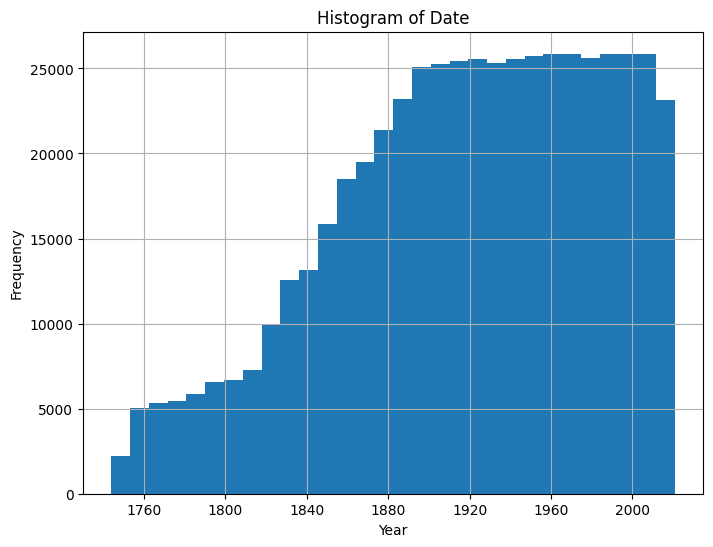

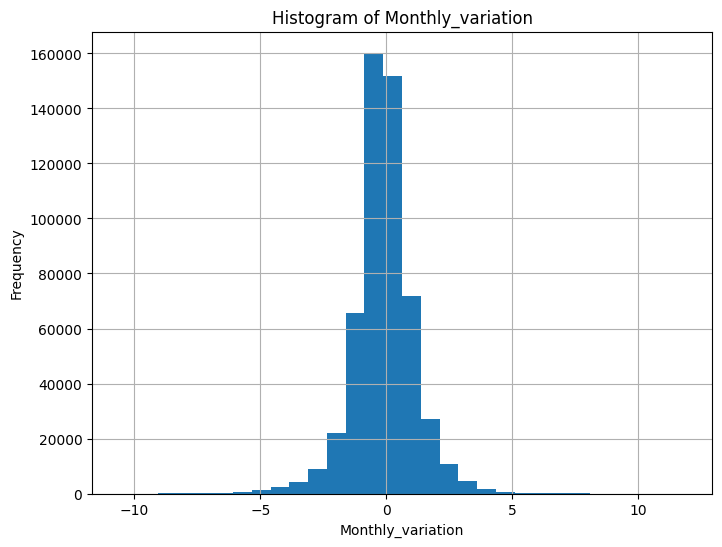

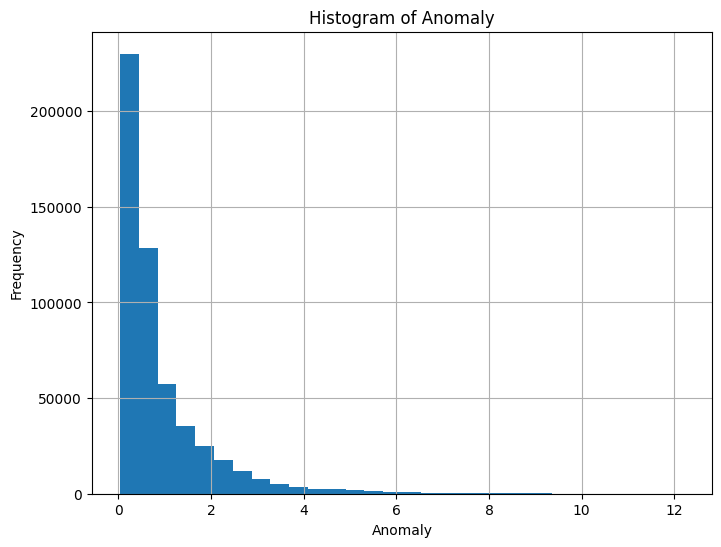

In [173]:
# Plotting individual Histograms
# Temperature
df['Temperature'].hist(bins=30, figsize=(8, 6))
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Date
df['Date'].hist(bins=30, figsize=(8, 6))
plt.title('Histogram of Date')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Monthly_variation
df['Monthly_variation'].hist(bins=30, figsize=(8, 6))
plt.title('Histogram of Monthly_variation')
plt.xlabel('Monthly_variation')
plt.ylabel('Frequency')
plt.show()

# Anomaly
df['Anomaly'].hist(bins=30, figsize=(8, 6))
plt.title('Histogram of Anomaly')
plt.xlabel('Anomaly')
plt.ylabel('Frequency')
plt.show()

